<div class="markdown-google-sans">

## **LAB 3**
</div>

<div class="markdown-google-sans">

<u>**1 Histogram equalization**</u>
</div>

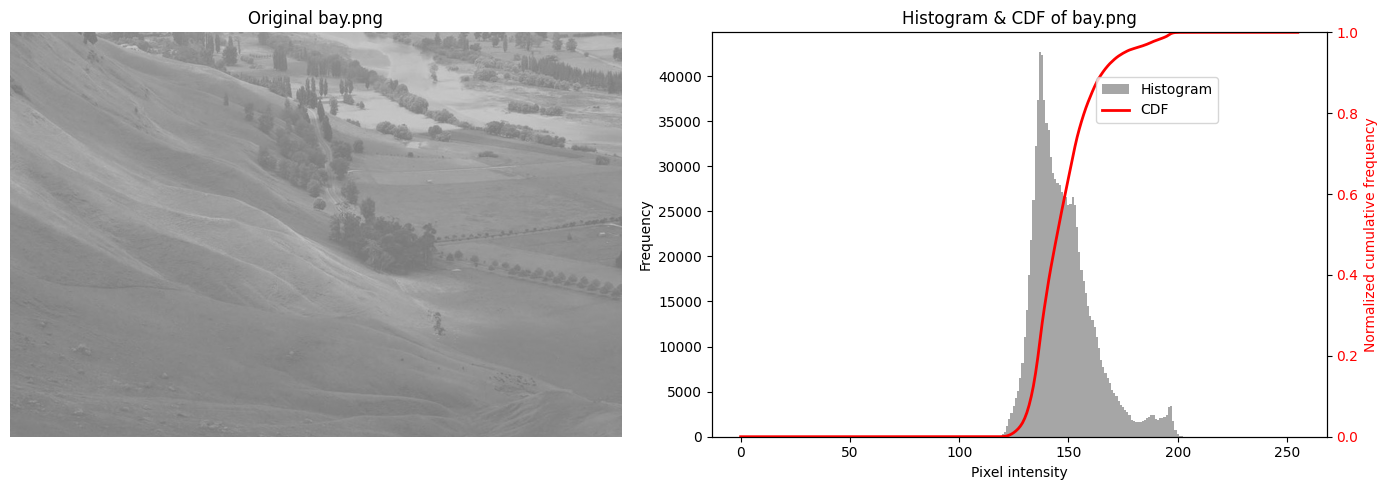

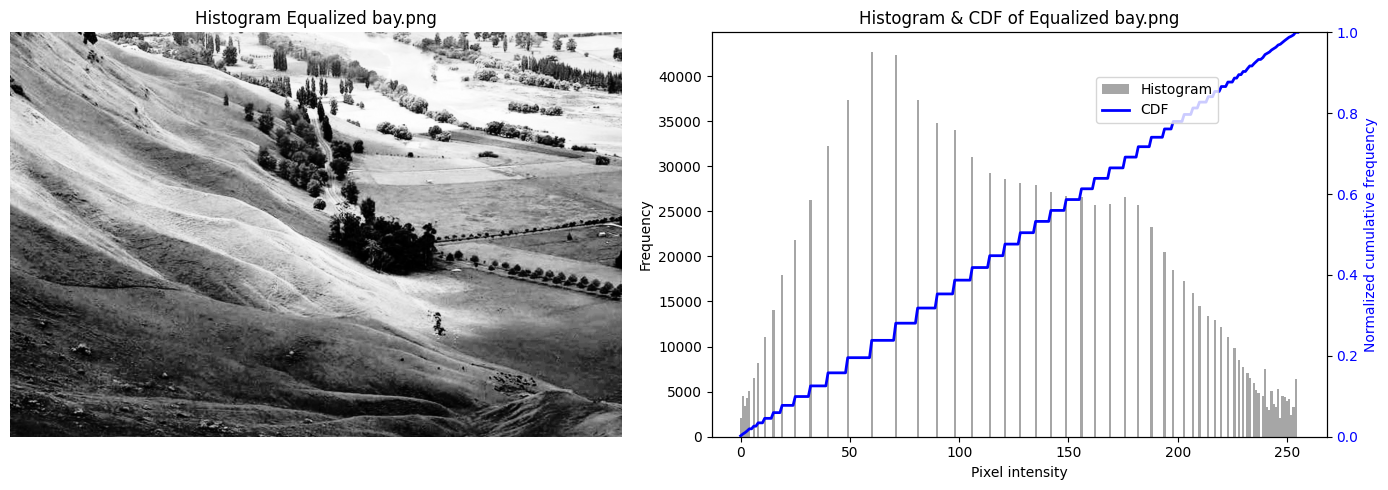

In [2]:
# Useful code snippet:
# read an image as gray-scale image
import cv2 
import numpy as np  
import matplotlib.pyplot as plt
img = cv2.imread('./bay.png', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError('Could not load ./bay.png')

# compute image histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# compute cumulative density function
cdf = hist.cumsum()
# normalize cdf
cdf_normalized = cdf / cdf.max()

# Visualize image with histogram and CDF overlay
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Show original image
axes[0].imshow(img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original bay.png')
axes[0].axis('off')

# Plot histogram and CDF together
ax1 = axes[1]
ax2 = ax1.twinx()

# Histogram as bar chart
ax1.bar(range(256), hist, width=1.0, color='gray', alpha=0.7, label='Histogram')
ax1.set_xlabel('Pixel intensity')
ax1.set_ylabel('Frequency', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# CDF as line plot
ax2.plot(cdf_normalized, color='red', linewidth=2, label='CDF')
ax2.set_ylabel('Normalized cumulative frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, 1])

axes[1].set_title('Histogram & CDF of bay.png')
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85))

plt.tight_layout()
plt.show()

# histogram equalization using CDF
cdf_masked = np.ma.masked_equal(cdf, 0)
cdf_scaled = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
cdf_scaled = np.ma.filled(cdf_scaled, 0).astype(np.uint8)

eq_img = cdf_scaled[img]

# Compute histogram and CDF of equalized image
eq_hist, _ = np.histogram(eq_img.flatten(), 256, [0, 256])
eq_cdf = eq_hist.cumsum()
eq_cdf_normalized = eq_cdf / eq_cdf.max()

# Show original vs equalized with their histograms and CDFs
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left: Equalized image
axes[0].imshow(eq_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Histogram Equalized bay.png')
axes[0].axis('off')

# Right: Histogram and CDF of equalized image
ax1 = axes[1]
ax2 = ax1.twinx()

# Histogram
ax1.bar(range(256), eq_hist, width=1.0, color='gray', alpha=0.7, label='Histogram')
ax1.set_xlabel('Pixel intensity')
ax1.set_ylabel('Frequency', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# CDF
ax2.plot(eq_cdf_normalized, color='blue', linewidth=2, label='CDF')
ax2.set_ylabel('Normalized cumulative frequency', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([0, 1])

axes[1].set_title('Histogram & CDF of Equalized bay.png')
fig.legend(loc='upper right', bbox_to_anchor=(0.88, 0.85))

plt.tight_layout()
plt.show()

<div class="markdown-google-sans">

<u>**2 Image denoising**</u>
</div>

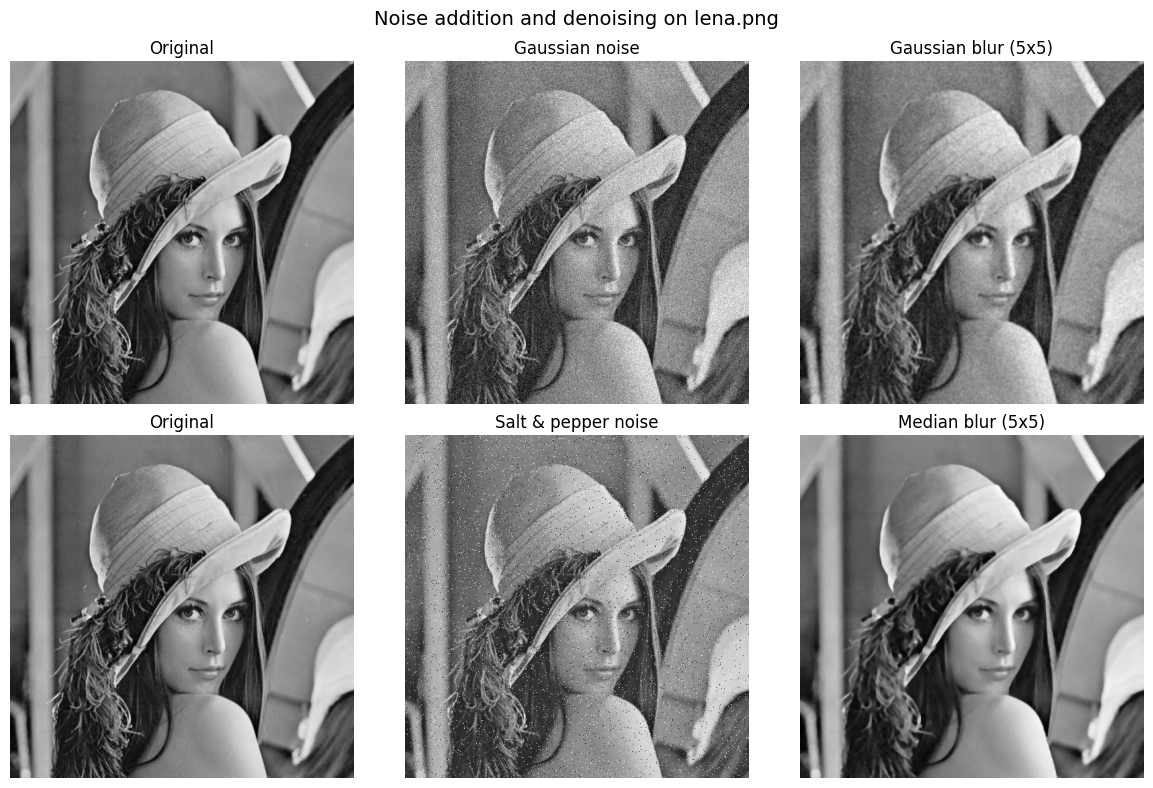

In [3]:
# convert a color image to gray-scale image

img = cv2.imread("./lena.png")
if img is None:
    raise FileNotFoundError("Could not load ./lena.png")

lena_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def add_gaussian_noise(
    image: np.ndarray,
    mean: float = 0.0,
    std: float = 15.0,
    rng: np.random.Generator | None = None,
) -> np.ndarray:
    """Add Gaussian noise to a grayscale image."""
    if rng is None:
        rng = np.random.default_rng()
    noise = rng.normal(mean, std, size=image.shape)
    noisy = image.astype(np.float32) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)


def add_salt_pepper_noise(
    image: np.ndarray,
    amount: float = 0.04,
    salt_vs_pepper: float = 0.5,
    rng: np.random.Generator | None = None,
) -> np.ndarray:
    """Add Salt & Pepper noise to a grayscale image."""
    if rng is None:
        rng = np.random.default_rng()

    noisy = image.copy()
    total_pixels = image.size
    num_salt = int(total_pixels * amount * salt_vs_pepper)
    num_pepper = int(total_pixels * amount * (1.0 - salt_vs_pepper))

    salt_coords = (
        rng.integers(0, image.shape[0], num_salt),
        rng.integers(0, image.shape[1], num_salt),
    )
    pepper_coords = (
        rng.integers(0, image.shape[0], num_pepper),
        rng.integers(0, image.shape[1], num_pepper),
    )

    noisy[salt_coords] = 255
    noisy[pepper_coords] = 0
    return noisy


rng = np.random.default_rng(42)

gaussian_noisy = add_gaussian_noise(lena_gray, std=20.0, rng=rng)
# Gaussian noise denoised with Gaussian blur
# 5x5 kernel keeps parity with other operations
gaussian_denoised = cv2.GaussianBlur(gaussian_noisy, (5, 5), sigmaX=0)

salt_pepper_noisy = add_salt_pepper_noise(lena_gray, amount=0.03, salt_vs_pepper=0.6, rng=rng)
# Salt & pepper noise denoised with median blur (distinct method)
salt_pepper_denoised = cv2.medianBlur(salt_pepper_noisy, 5)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Noise addition and denoising on lena.png", fontsize=14)

images = [
    (lena_gray, "Original"),
    (gaussian_noisy, "Gaussian noise"),
    (gaussian_denoised, "Gaussian blur (5x5)"),
    (lena_gray, "Original"),
    (salt_pepper_noisy, "Salt & pepper noise"),
    (salt_pepper_denoised, "Median blur (5x5)"),
]

for ax, (image, title) in zip(axes.flat, images):
    ax.imshow(image, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()


<div class="markdown-google-sans">

<u>**3 Image gradient**</u>
</div>

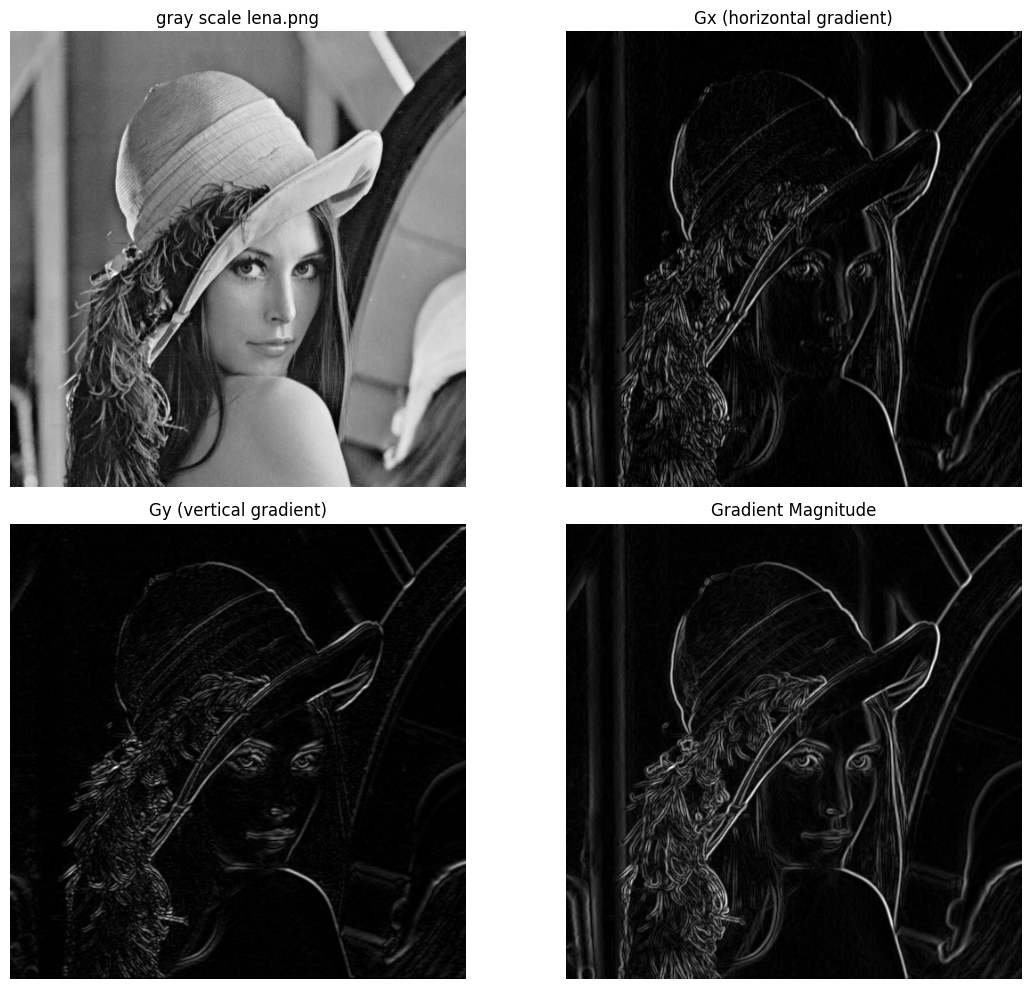

Gx shape: (512, 512), min: -8507.00, max: 6872.00
Gy shape: (512, 512), min: -7769.00, max: 6200.00
Magnitude shape: (512, 512), min: 0.00, max: 8681.76


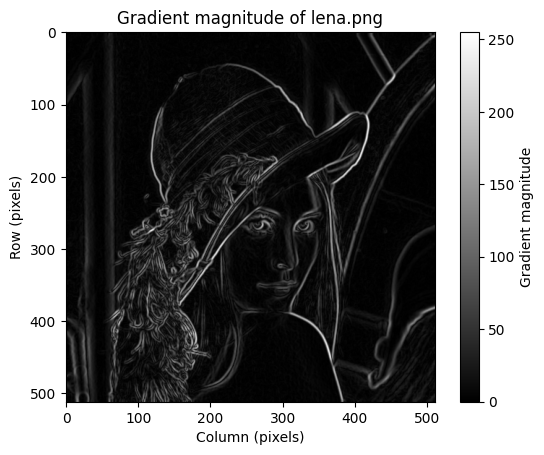

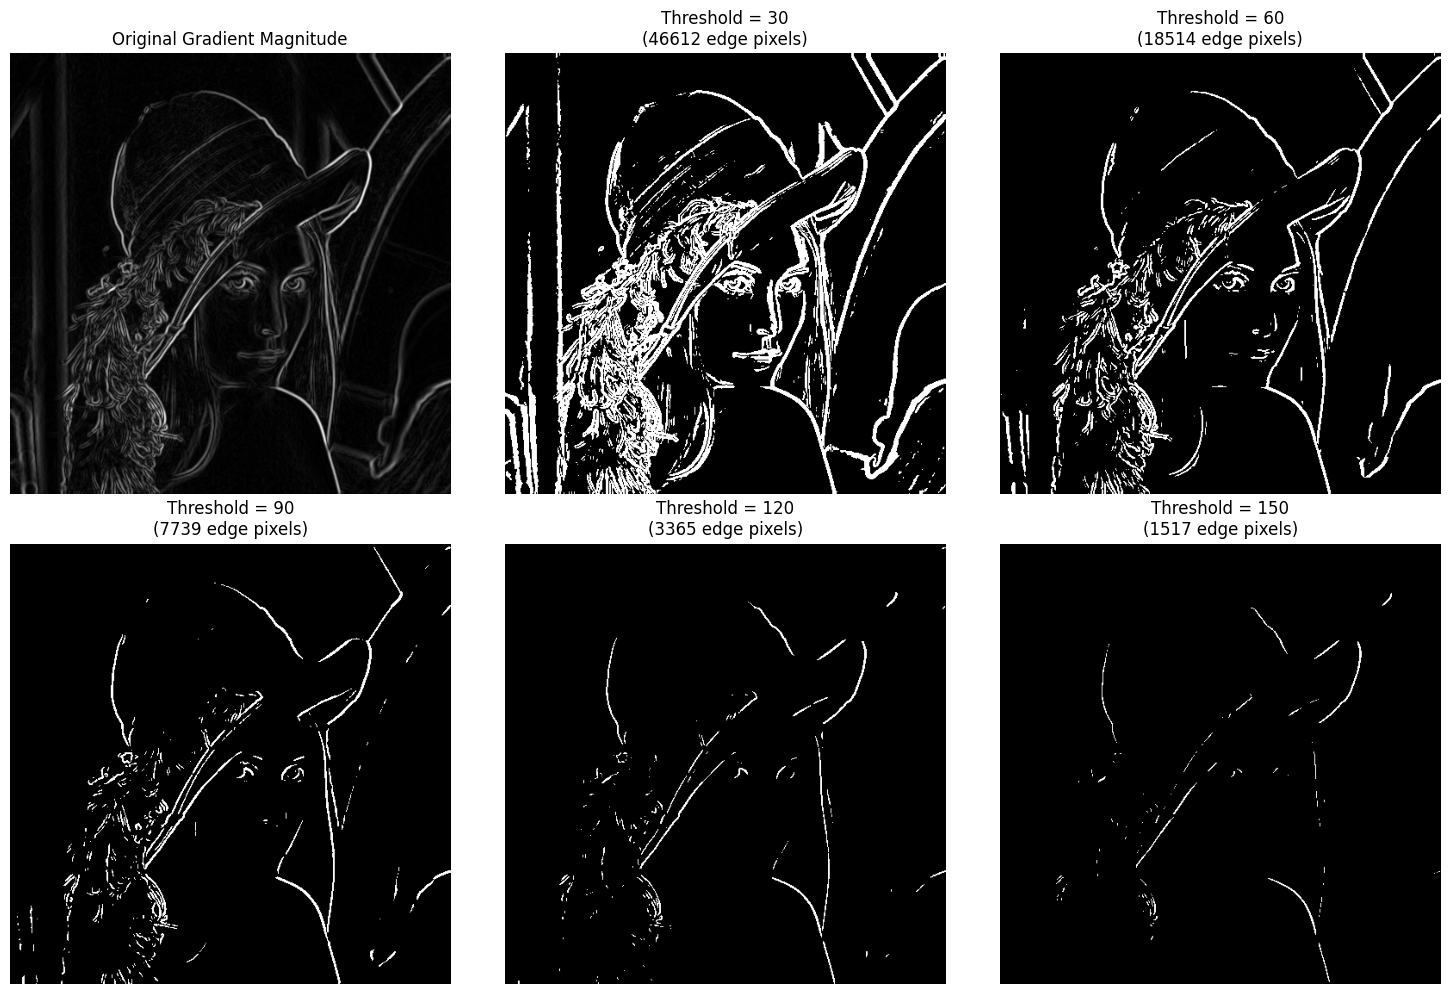

Gradient magnitude statistics:
Min: 0.0, Max: 255.0
Mean: 18.35, Median: 8.20


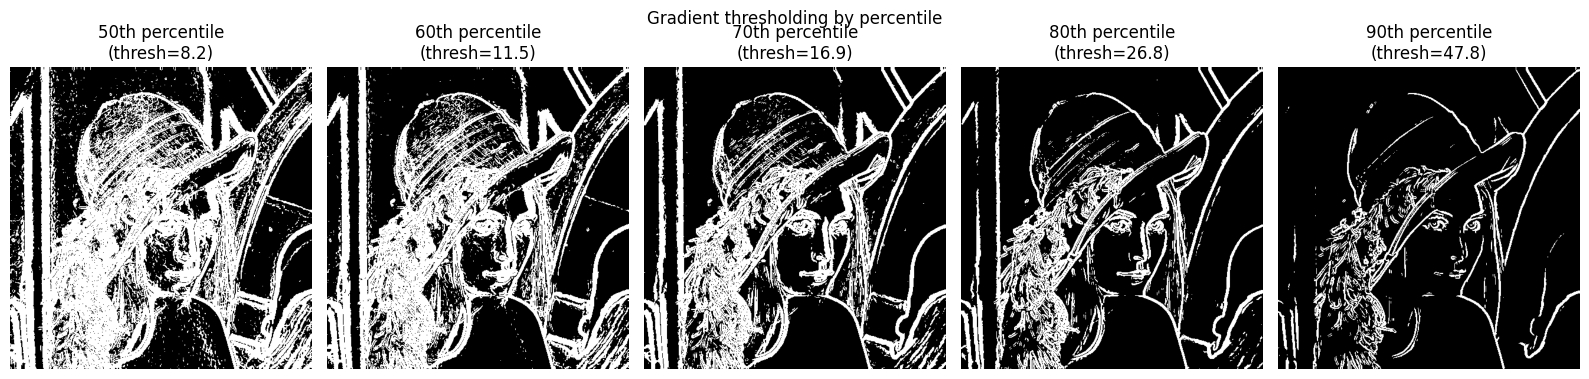

In [4]:
# convert image to gray-scale image
img = cv2.imread("./lena.png")
lena_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# compute gradient
gx = cv2.Sobel(lena_gray, cv2.CV_64F, 1, 0, ksize=5)
gy = cv2.Sobel(lena_gray, cv2.CV_64F, 0, 1, ksize=5)

# Compute gradient magnitude
magnitude = cv2.magnitude(gx, gy)

# Normalize for display
gx_norm = cv2.normalize(np.abs(gx), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
gy_norm = cv2.normalize(np.abs(gy), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Display gradient results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(lena_gray, cmap='gray')
axes[0, 0].set_title('gray scale lena.png')
axes[0, 0].axis('off')

axes[0, 1].imshow(gx_norm, cmap='gray')
axes[0, 1].set_title('Gx (horizontal gradient)')
axes[0, 1].axis('off')

axes[1, 0].imshow(gy_norm, cmap='gray')
axes[1, 0].set_title('Gy (vertical gradient)')
axes[1, 0].axis('off')

axes[1, 1].imshow(magnitude_norm, cmap='gray')
axes[1, 1].set_title('Gradient Magnitude')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

print(f"Gx shape: {gx.shape}, min: {gx.min():.2f}, max: {gx.max():.2f}")
print(f"Gy shape: {gy.shape}, min: {gy.min():.2f}, max: {gy.max():.2f}")
print(f"Magnitude shape: {magnitude.shape}, min: {magnitude.min():.2f}, max: {magnitude.max():.2f}")

magnitude = cv2.magnitude(gx, gy)

magnitude_norm = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
magnitude_uint8 = magnitude_norm.astype(np.uint8)
# display the gradient
plt.imshow(magnitude_uint8, cmap="gray")
plt.title("Gradient magnitude of lena.png")
plt.xlabel("Column (pixels)")
plt.ylabel("Row (pixels)")
plt.colorbar(label="Gradient magnitude")
plt.show()

# Apply various thresholds to gradient magnitude
thresholds = [30, 60, 90, 120, 150]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.flatten()

# Original gradient magnitude
axs[0].imshow(magnitude_norm, cmap='gray')
axs[0].set_title('Original Gradient Magnitude')
axs[0].axis('off')

# Apply different thresholds
for i, thresh in enumerate(thresholds, start=1):
    # Create binary edge map: 255 where magnitude > threshold, 0 otherwise
    edges = (magnitude_norm > thresh).astype(np.uint8) * 255
    
    axs[i].imshow(edges, cmap='gray')
    axs[i].set_title(f'Threshold = {thresh}\n({np.sum(edges > 0)} edge pixels)')
    axs[i].axis('off')

plt.tight_layout()
plt.show()

# Or use percentage-based thresholds
print("Gradient magnitude statistics:")
print(f"Min: {magnitude_norm.min()}, Max: {magnitude_norm.max()}")
print(f"Mean: {magnitude_norm.mean():.2f}, Median: {np.median(magnitude_norm):.2f}")

# Apply percentage-based thresholds (e.g., top 10%, 20%, etc.)
percentiles = [50, 60, 70, 80, 90]
fig, axes = plt.subplots(1, len(percentiles), figsize=(16, 4))

for ax, pct in zip(axes, percentiles):
    thresh_val = np.percentile(magnitude_norm, pct)
    edges = (magnitude_norm > thresh_val).astype(np.uint8) * 255
    ax.imshow(edges, cmap='gray')
    ax.set_title(f'{pct}th percentile\n(thresh={thresh_val:.1f})')
    ax.axis('off')

plt.suptitle('Gradient thresholding by percentile')
plt.tight_layout()
plt.show()

